In [ ]:
pip install opencv-python

In [ ]:
pip install scikit-image

In [1]:
%matplotlib inline


# GLCM Texture Features

This example illustrates texture classification using gray level
co-occurrence matrices (GLCMs) [1]_. A GLCM is a histogram of co-occurring
grayscale values at a given offset over an image.

In this example, samples of two different textures are extracted from
an image: grassy areas and sky areas. For each patch, a GLCM with
a horizontal offset of 5 (`distance=[5]` and `angles=[0]`) is computed.
Next, two features of the GLCM matrices are computed: dissimilarity and
correlation. These are plotted to illustrate that the classes form
clusters in feature space.
In a typical classification problem, the final step (not included in
this example) would be to train a classifier, such as logistic
regression, to label image patches from new images.

## References
.. [1] Haralick, RM.; Shanmugam, K.,
       "Textural features for image classification"
       IEEE Transactions on systems, man, and cybernetics 6 (1973): 610-621.
       :DOI:`10.1109/TSMC.1973.4309314`
<div style="direction: rtl;color: #4E4AE5;font-size: large;">
    این مثال طبقه بندی بافت را با استفاده از طبقه بندی بافت با استفاده از ماتریس های همزمانی سطح خاکستری  نشان می دهد
    </b>
    در این مثال ، نمونه هایی از دو بافت مختلف از یک تصویر استخراج شده است: مناطق چمنزار و مناطق آسمانی. برای هر وصله ، یک GLCM با افست افست 5 محاسبه می شود. بعد ، دو ویژگی از ماتریس های GLCM محاسبه می شود: عدم شباهت و همبستگی. اینها رسم شده است تا نشان دهد که کلاسها به صورت خوشه ای در فضای ویژگی تشکیل می شوند.
    در یک مشکل طبقه بندی معمولی ، مرحله آخر (در این مثال گنجانده نشده است) آموزش یک طبقه بندی ، مانند رگرسیون لجستیک ، برای برچسب گذاری وصله های تصاویر از تصاویر جدید است
    </div>
.


In [5]:
import matplotlib.pyplot as plt
from __future__ import print_function

In [6]:

import numpy as np
from skimage.feature import greycomatrix


from skimage import data
from skimage.feature import greycoprops


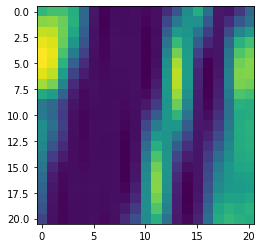

In [13]:

PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

plt.imshow(grass_patches[1])

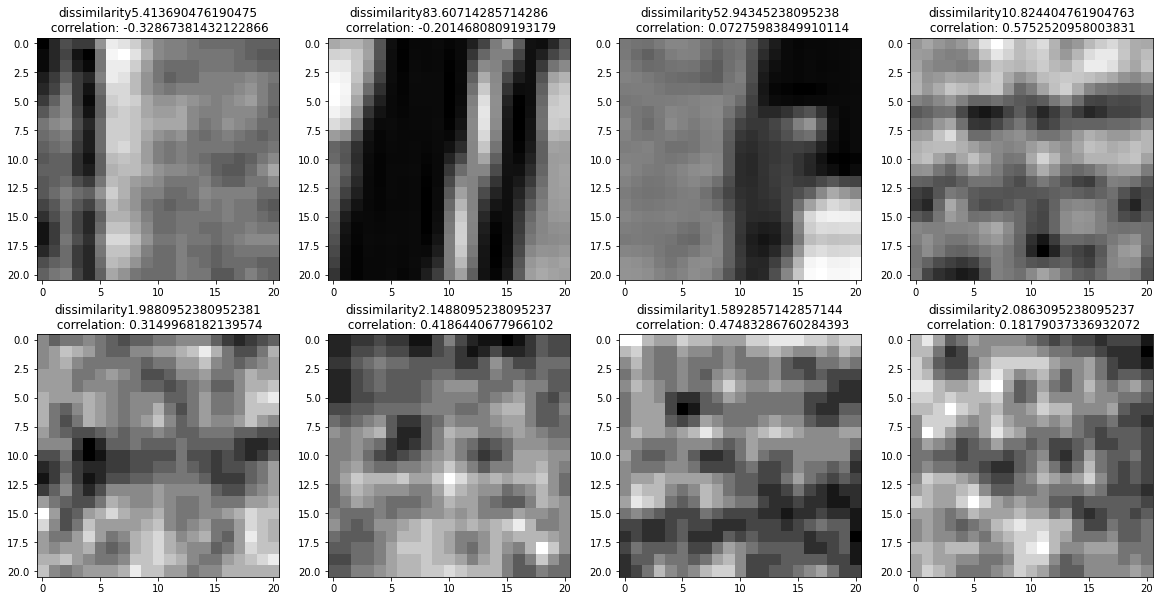

In [28]:
# compute some GLCM properties each patch
plt.figure(figsize=(20,10))
xs = []
ys = []
i=0
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    i+=1
    x=plt.subplot(2,4,i)
    x.title.set_text('dissimilarity'+str(greycoprops(glcm, 'dissimilarity')[0, 0])+"\n correlation: "+str(greycoprops(glcm, 'correlation')[0, 0]))
    plt.imshow(patch,cmap="gray")



In [40]:
print(xs)
print("-----------------")
print(xs[:4])
print("-----------------")
print(xs[4:])

[5.413690476190475, 83.60714285714286, 52.94345238095238, 10.824404761904763, 1.9880952380952381, 2.1488095238095237, 1.5892857142857144, 2.0863095238095237]
-----------------
[5.413690476190475, 83.60714285714286, 52.94345238095238, 10.824404761904763]
-----------------
[1.9880952380952381, 2.1488095238095237, 1.5892857142857144, 2.0863095238095237]


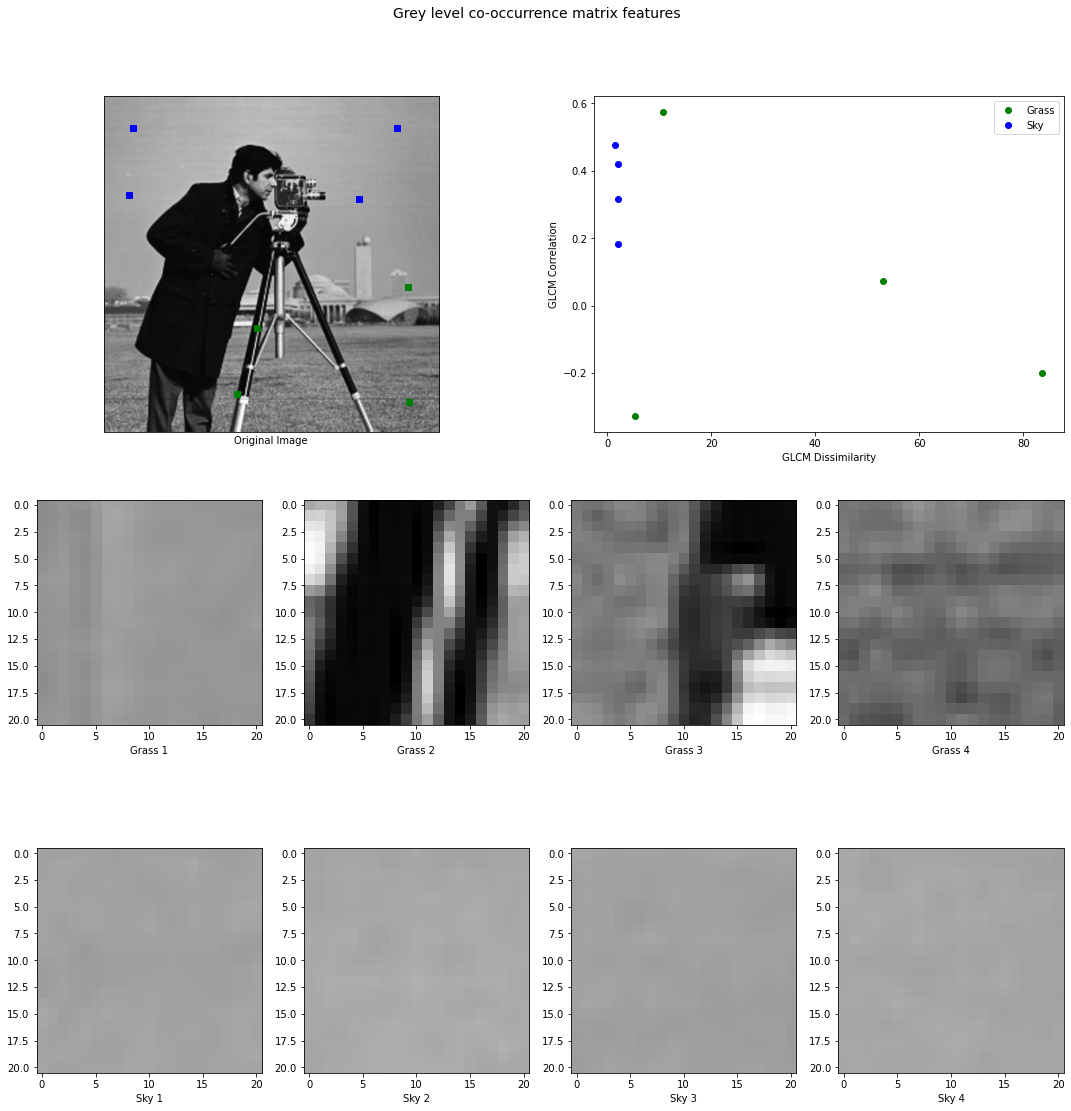

In [29]:


# create the figure
fig = plt.figure(figsize=(15, 15))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',  label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',  label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()